# IA Paper 4 - Mathematics - Examples paper 2

## Question 2: 3D plotting of planes

Without solving the following simultaneous equations, determine the value of $s$ for which they have no solution when $t = 1$.

\begin{align}
2x + y + 3z &= 5 \\
6x - 2y - z &= 3 \\
sx + z &= t
\end{align}

For this value of $s$ determine the value of $t$ for which the equations have an infinite number of solutions. Use Python/Matplotlib to visualize the three planes for these and other values of $s$ and $t$. Make sure you understand how the planes' intersections relate to the values of $s$ and $t$.

### Solution

We first load the required modules:

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Special command for plotting inside a Jupyter notebook
%matplotlib inline

Then, in order to plot the planes in `matplotlib`, we need to construct a grid of `x-` and `y-` values, so that we can evaluate `z` at each of these points.

In [2]:
# These commands construct a grid of x and y values on which we are
# going to sample points to get the z values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

Now we can calculate the z-values for these plane. 

In [3]:
# Change these values to see what effect they have on the planes
s = 2.0
t = 13.5/5.0

# Now we calculate the z coordinates at all points on the grid, one
# for each plane, using the three plane equations
Z0 = (5 - 2*X - Y)/3
Z1 = 6*X - 2*Y - 3
Z2 = t - s*X

And then plot these planes on a 3D plot. 

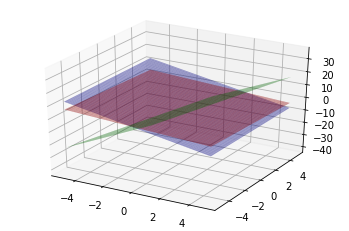

In [4]:
# Create 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# We now add colour on each plane
ax.plot_surface(X, Y, Z0, color='r', alpha=0.4)
ax.plot_surface(X, Y, Z1, color='g', alpha=0.4)
ax.plot_surface(X, Y, Z2, color='b', alpha=0.4);

## Question 6

(i) Plot the function $f(x) = \cosh(1 + x)$ and its power series expansions using 1, 2, 3, and 4 terms. Also plot the difference between the exact function $f(x)$ and the power series expansions. What are the x–ranges over which the power series expansions differ by less than 0.01 from the exact function?

(ii) Repeat with the function $f(x) = (1 + x)/(1 − x^2)$. What are the ranges over which the power series expansions are acurate to $1\%$ and $10\%$ of the real fuction?


### Solution

First, we load the modules.

In [5]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

We now look at the original function of $y = \cosh(x+1)$. 

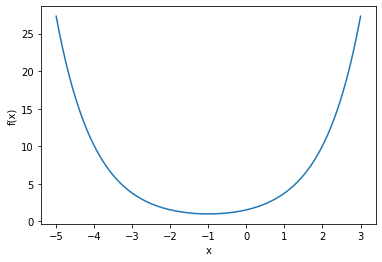

In [6]:
# The original function y = cosh(1 + x)
num_points = 200
x = np.linspace(-5.0, 3.0, num_points)
y_ref = np.cosh(1 + x)

# Plot the original function
plt.plot(x, y_ref)

# Add label for the plot
plt.xlabel("x")
plt.ylabel("f(x)");

We need to write a factorial function that can be used later on. 

In [7]:
# Factorial function
def factorial(n):
    temp = 1.0
    for i in np.arange(1, n + 1):
        temp *= i
    return temp

The Taylor series for the function $f(x) = \cosh(x+1)$ is:

$$
\cosh(x+1) = \cosh(1) + x \sinh(1) + \dfrac{x^2}{2!} \cosh(1) + \dfrac{x^3}{3!} \cosh(1) + \mathcal{O}(x^4)
$$

We now plot the function obtained from a finite number of terms in the quoted Taylor.

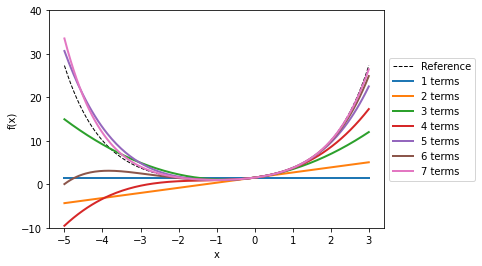

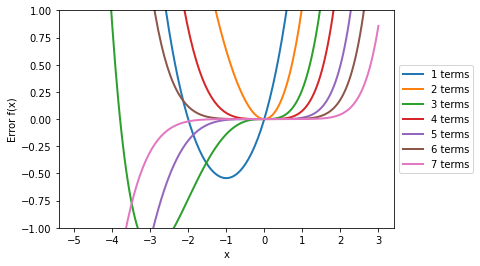

In [8]:
# Now the power series
max_terms = 100

# Initialise zero array
y_power_series = np.zeros(num_points)

# Initilise array to store the error
error_conv = []

# Split to two subplots
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
# fig2, ax2 = plt.subplots(figsize=(8, 6))

# Plot the reference function
ax1.plot(x, y_ref, 'k', label="Reference", lw=1.0, ls='--')

# Step through the number of terms
for i in range(0, max_terms):
    # Adding terms to power series
    if i % 2 == 0:
        y_power_series = y_power_series \
            + np.power(x, i)/factorial(i)*np.cosh(1)
    else:
        y_power_series = y_power_series \
            + np.power(x, i)/factorial(i)*np.sinh(1)

    if i <= 6:
        ax1.plot(x, y_power_series, label='%d terms' % (i + 1), lw=2.0)
        ax2.plot(x, (y_ref - y_power_series), label='%d terms' % (i+1), lw=2.0)

    # Calculate the relative least-square difference
    error_conv.append(np.linalg.norm
                      (y_power_series - y_ref) / np.linalg.norm(y_ref))

# Insert legends
ax1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Set limit
ax1.set_ylim((-10, 40))
ax2.set_ylim((-1, 1))

# Label axes
ax1.set_xlabel('x')
ax2.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax2.set_ylabel('Error f(x)');

To offer a better understand, let's look at an interacting version of these plots. This can only be run locally, or at <https://jupyter.eng.cam.ac.uk:8000>. You will need the package `ipywidgets` installed. 

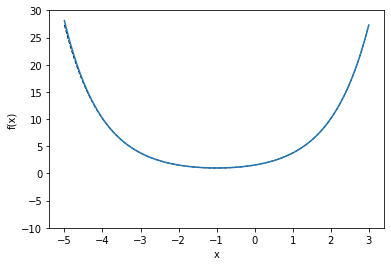

In [9]:
# Let's try an interactive notebook
from ipywidgets import *


def plot_power_series(n):
    # Initialise zero array
    y_power_series = np.zeros(num_points)
    # Step through the number of terms
    for i in range(0, n+1):
        # Adding terms to power series
        if i % 2 == 0:
            y_power_series = y_power_series + \
                np.power(x, i)/factorial(i)*np.cosh(1)
        else:
            y_power_series = y_power_series + \
                np.power(x, i)/factorial(i)*np.sinh(1)

    # Plot the reference function
    plt.plot(x, y_ref, 'k', label="Reference", lw=1.0, ls='--')

    # Update the plot
    plt.plot(x, y_power_series)
    plt.ylim([-10, 30])

    # Add axis label
    plt.xlabel('x')
    plt.ylabel('f(x)')

interact(plot_power_series, n=(0, 20, 1));

We can check the convergence rate of the Taylor series expansion by looking at the least-square error relative to the exact function. 

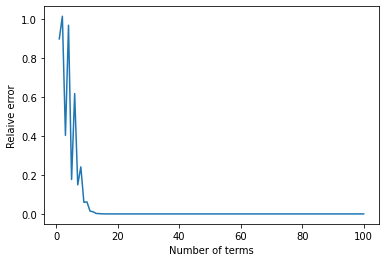

In [10]:
# Let's plot the convergence, measured by least-square error
# Plot the convergence against number of terms used
plt.plot(range(1, max_terms+1), error_conv)
plt.xlabel("Number of terms")
plt.ylabel("Relaive error");

(ii) The next function to look at is:

$$
f(x) = \dfrac{1+x}{1-x^2}
$$

When plotting this graph, care is required to handle the case when $x = 1$ and $x = -1$. At these values of $x$, $f(x)$ will become `NaN` - Not A Number. We can replace these values of $f(x)$ with 0.5. 

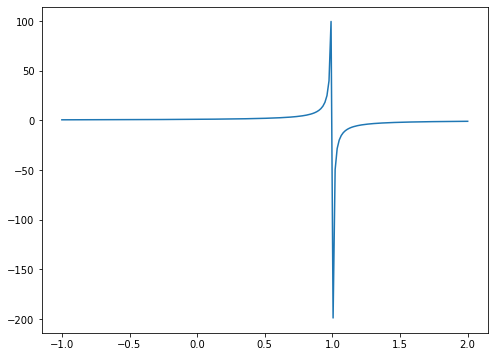

In [11]:
# Hide the original numpy warning of division by 0
np.seterr(divide='ignore', invalid='ignore')

# Now the next function
# y = (1+x) / (1 - x^2)
num_points = 200
x_ii = np.linspace(-1, 2, num_points)

# There is going to be NaN values of y at x = -1
# as the function becomes 0/0
y_ii_ref = (1 + x_ii)/(1-np.power(x_ii, 2))

# Check for NaN values
nan_inds = np.where(np.isnan(y_ii_ref))

# Replace NaN values
y_ii_ref[nan_inds] = 0.5

# Intilise figure size
plt.figure(figsize=(8, 6))

# Plot the reference
plt.plot(x_ii, y_ii_ref);

Again, the Taylor series for $f(x)$ is:

$$
f(x) = \dfrac{1+x}{1-x^2} = 1 + x + x^2 + \mathcal{O}(x^3)
$$

We then plot the Taylor expansion using different number of terms, and again an interactive cell to illustrate the performance of the Taylor series.

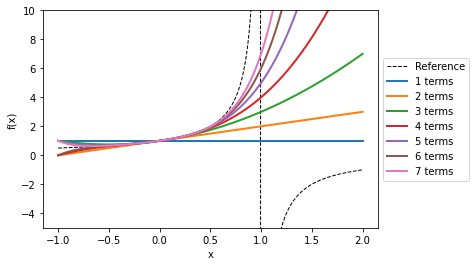

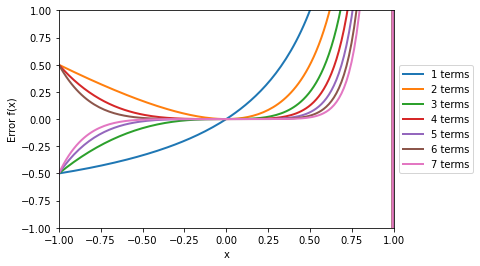

In [12]:
# Split to two subplots
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

# Plot the reference function
ax1.plot(x_ii, y_ii_ref, 'k', label="Reference", lw=1.0, ls='--')

# Define the maximum number of terms and initlise zero array
max_terms = 100
y_ii_power_series = np.zeros(num_points)

# Initilise array to store the error
error_conv = []

# Step through the number of terms
for i in range(0, max_terms):
    # Adding terms to power series
    y_ii_power_series = y_ii_power_series + np.power(x_ii, i)

    if i <= 6:
        ax1.plot(x_ii, y_ii_power_series,
                 label='%d terms' % (i + 1), lw=2.0)
        ax2.plot(x_ii, (y_ii_ref - y_ii_power_series),
                 label='%d terms' % (i + 1), lw=2.0)

    # Calculate the relative least-square difference
    error_conv.append(np.linalg.norm(
            y_ii_power_series - y_ii_ref)/np.linalg.norm(y_ii_ref))

# Plot the relative functions
ax1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Set limit on y axis
ax1.set_ylim([-5, 10])
ax2.set_ylim([-1, 1])
ax2.set_xlim([-1, 1])

# Label axes
ax1.set_xlabel('x')
ax2.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax2.set_ylabel('Error f(x)');

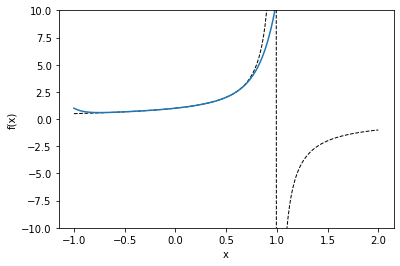

In [13]:
# Again, another interactive notebook
def plot_power_series_ii(n):
    # Initialise zero array
    y_ii_power_series = np.zeros(num_points)

    # Step through the number of terms
    for i in range(0, n + 1):
        # Adding terms to power series
        y_ii_power_series = y_ii_power_series + np.power(x_ii, i)

    # Plot the reference function
    plt.plot(x_ii, y_ii_ref, 'k',
             label="Reference", lw=1.0, ls='--')

    # Update the plot
    plt.plot(x_ii, y_ii_power_series)

    # Set limit on y axis
    plt.ylim([-10, 10])

    # Add axis label
    plt.xlabel('x')
    plt.ylabel('f(x)')

interact(plot_power_series_ii, n=(0, 20, 1));